# Title

Continuous Assessment 2 10/11/2023 - BD & ADA Module // MSc in Data Analytics Y1 S2 - Student ID 2023063

Data: ProjectsTweets.csv

Github: https://github.com/ASM2023063/mscda-20232-ca2

### 1. Research Understanding Phase 


### Draft rewrite description later
- In this study an overarching analysis of Customer behavior in eCommerce shop was provided, preparing the customers’ event data for modeling and analysis to predict the number of purchases future customers will do.
- PySparkSQL and TensorFlow were used in Jupyter Notebook file to complete this task, using SQL and Python coding language.
- To perform an organized and clear understanding of the study timeline, Cross Industry Standard Process for Data Mining (CRISP-DM) Methodology was used, and the cells of code were grouped according to the methodology’s phases.
- An Artificial Neural Network model was applied to the chosen variables X and y. For the evaluation phase Mean Absolute Error (MAE) and Mean Squared Error (MSE) were registered to measure the error between predicted and actual values.



### 2. Data Understanding Phase

Practical Big Data 


In [3]:
#Import PySparkSQL
import pyspark
from pyspark.sql import SparkSession        

# Create SparkSession with enableHiveSupport
df = (SparkSession
  .builder
  .master("local[*]")
  .appName("SparkSQL")
  .enableHiveSupport() 
  .getOrCreate())

# Path to dataset
csv_file = "file:////home/hduser/Downloads/2023063_CA2/ProjectTweets.csv"

In [4]:
# Read and create a temporary view
df = (spark.read.format("csv")
  .option("inferSchema", "true")
  .option("header", "false")
  .load(csv_file)
  .toDF("id","number","date","query","name","body"))
df.createOrReplaceTempView("temp_view")

In [5]:
# Visualise inferred schema
data = spark.sql("SELECT * FROM temp_view")
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- number: long (nullable = true)
 |-- date: string (nullable = true)
 |-- query: string (nullable = true)
 |-- name: string (nullable = true)
 |-- body: string (nullable = true)



In [6]:
# Display 5 first rows
data.show(5)

+---+----------+--------------------+--------+---------------+--------------------+
| id|    number|                date|   query|           name|                body|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [7]:
# Create database
spark.sql("CREATE DATABASE IF NOT EXISTS projectdb")

2023-10-23 12:05:09,104 WARN conf.HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
2023-10-23 12:05:09,104 WARN conf.HiveConf: HiveConf of name hive.stats.retries.wait does not exist
2023-10-23 12:05:10,355 WARN metastore.ObjectStore: Version information not found in metastore. hive.metastore.schema.verification is not enabled so recording the schema version 2.3.0
2023-10-23 12:05:10,355 WARN metastore.ObjectStore: setMetaStoreSchemaVersion called but recording version is disabled: version = 2.3.0, comment = Set by MetaStore hduser@127.0.1.1
2023-10-23 12:05:10,493 WARN metastore.ObjectStore: Failed to get database global_temp, returning NoSuchObjectException
2023-10-23 12:05:10,500 ERROR metastore.RetryingHMSHandler: AlreadyExistsException(message:Database projectdb already exists)
	at org.apache.hadoop.hive.metastore.HiveMetaStore$HMSHandler.create_database(HiveMetaStore.java:925)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeM

DataFrame[]

In [8]:
# Create table in database
spark.sql("CREATE TABLE IF NOT EXISTS projectdb.tweetsTable (id Int, number long, date String, query String, name String, body String)")

2023-10-23 12:05:12,231 WARN analysis.ResolveSessionCatalog: A Hive serde table will be created as there is no table provider specified. You can set spark.sql.legacy.createHiveTableByDefault to false so that native data source table will be created instead.
2023-10-23 12:05:12,388 WARN session.SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
2023-10-23 12:05:12,472 WARN conf.HiveConf: HiveConf of name hive.internal.ss.authz.settings.applied.marker does not exist
2023-10-23 12:05:12,472 WARN conf.HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
2023-10-23 12:05:12,472 WARN conf.HiveConf: HiveConf of name hive.stats.retries.wait does not exist
2023-10-23 12:05:12,495 ERROR metastore.RetryingHMSHandler: AlreadyExistsException(message:Table tweetstable already exists)
	at org.apache.hadoop.hive.metastore.HiveMetaStore$HMSHandler.create_table_core(HiveMetaStore.java:1416)
	at org.apac

DataFrame[]

In [7]:
# Alocate data to hive database
#spark.sql("INSERT INTO TABLE projectdb.tweetsTable SELECT * FROM temp_view")

In [9]:
# Display table content
spark.sql("SELECT * FROM projectdb.tweetsTable").show(10,truncate=False)

+------+----------+----------------------------+--------+---------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|id    |number    |date                        |query   |name           |body                                                                                                                                     |
+------+----------+----------------------------+--------+---------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|816210|1551363506|Sat Apr 18 08:51:40 PDT 2009|NO_QUERY|prosario_2000  |@ctribe I hope you are having a great day.                                                                                               |
|816211|1551363569|Sat Apr 18 08:51:39 PDT 2009|NO_QUERY|Chelsea_Volturi|@Boy_Kill_Boy Nope Just Bored Well Say That Most Of The Time The Usual         

In [9]:
# Number of rows
spark.sql("SELECT count(*) as total FROM projectdb.tweetsTable").show()

+-------+
|  total|
+-------+
|1600000|
+-------+



In [10]:
# Number of unique rows
df2 = spark.sql("SELECT count(distinct *) FROM projectdb.tweetsTable")
df2.show()

+---------------------------------------------------+
|count(DISTINCT id, number, date, query, name, body)|
+---------------------------------------------------+
|                                            1600000|
+---------------------------------------------------+



### 3. Data Preparation Phase

In [11]:
# Import library
import pyspark.sql.functions
from pyspark.sql.functions import split, to_date, date_format

In [12]:
# Create variable 
tweet_data = spark.sql("SELECT * FROM projectdb.tweetsTable")

In [13]:
# Split column date into new columns
tweet_data = tweet_data.withColumn("date_parts", split(tweet_data["date"]," "))

tweet_data = tweet_data.withColumn("month", tweet_data["date_parts"][1])
tweet_data = tweet_data.withColumn("day", tweet_data["date_parts"][2])
tweet_data = tweet_data.withColumn("time", tweet_data["date_parts"][3])
tweet_data = tweet_data.withColumn("year", tweet_data["date_parts"][5])
tweet_data = tweet_data.withColumn("weekday", tweet_data["date_parts"][0])
tweet_data = tweet_data.withColumn("timezone", tweet_data["date_parts"][4])

In [14]:
# Split new column time into new columns
tweet_data = tweet_data.withColumn("time_format", split(tweet_data["time"],":"))

tweet_data = tweet_data.withColumn("hour", tweet_data["time_format"][0])
tweet_data = tweet_data.withColumn("minute", tweet_data["time_format"][1])
tweet_data = tweet_data.withColumn("second", tweet_data["time_format"][2])


In [15]:
# Drop columns
tweet_data = tweet_data.drop("date_parts")
tweet_data = tweet_data.drop("date")
tweet_data = tweet_data.drop("number")
tweet_data = tweet_data.drop("query")
tweet_data = tweet_data.drop("time_format")
tweet_data = tweet_data.drop("time")

In [16]:
# Check changes 
tweet_data.show()

+------+---------------+--------------------+-----+---+----+-------+--------+----+------+------+
|    id|           name|                body|month|day|year|weekday|timezone|hour|minute|second|
+------+---------------+--------------------+-----+---+----+-------+--------+----+------+------+
|816210|  prosario_2000|@ctribe I hope yo...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    40|
|816211|Chelsea_Volturi|@Boy_Kill_Boy Nop...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    39|
|816212|askbillmitchell|@marty0518 Someti...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    41|
|816213|       kendiixd|so i guesss im no...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    41|
|816214|    ladycalypso|@DaiLS I do that,...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    42|
|816215| FindingAnswers|trendy topic - Re...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    43|
|816216|      HTwashere|@firsttiger Real ...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    43|
|816217|     kelliekano|@Drago

In [17]:
# Sentiment analysis 

#!pip install vaderSentiment
#!pip install nltk

In [17]:
# Load library
import nltk

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import when

In [18]:
# Define function  and create sentiment_score column
def analyse_sentiment(body):
    analyser = SentimentIntensityAnalyzer()
    sentiment = analyser.polarity_scores(body)
    return sentiment['compound']

sentiment_udf = udf(analyse_sentiment, DoubleType())

tweet_data = tweet_data.withColumn("sentiment_score", sentiment_udf(tweet_data['body']))

In [20]:
tweet_data.write.mode("overwrite").saveAsTable("tweet_data2")

In [19]:
# New column polarity based on compound value
tweet_data = tweet_data.withColumn("polarity", when (tweet_data["sentiment_score"]>= 0.05, "positive")
                                                .when(tweet_data["sentiment_score"]<=-0.05, "negative")
                                                .otherwise("neutral")
                                                )

In [20]:
# Display data
tweet_data.show(5, truncate=False)

+------+---------------+--------------------------------------------------------------------------------------------------------+-----+---+----+-------+--------+----+------+------+---------------+--------+
|id    |name           |body                                                                                                    |month|day|year|weekday|timezone|hour|minute|second|sentiment_score|polarity|
+------+---------------+--------------------------------------------------------------------------------------------------------+-----+---+----+-------+--------+----+------+------+---------------+--------+
|816210|prosario_2000  |@ctribe I hope you are having a great day.                                                              |Apr  |18 |2009|Sat    |PDT     |08  |51    |40    |0.7906         |positive|
|816211|Chelsea_Volturi|@Boy_Kill_Boy Nope Just Bored Well Say That Most Of The Time The Usual                                  |Apr  |18 |2009|Sat    |PDT     |08  |51    |39 

In [23]:
# Data preparation to make visualisations

tweet_pandas = tweet_data.toPandas()

In [24]:
# Import library
import pandas as pd

In [25]:
# Function to convert month to number
def convert_to_number(abbrev):
    month_abbrev_to_number= {
        'Jan':'01', 
        'Fev':'02', 
        'Mar':'03', 
        'Apr':'04', 
        'May':'05', 
        'Jun':'06', 
        'Jul':'07', 
        'Aug':'08', 
        'Sep':'09', 
        'Oct':'10', 
        'Nov':'11', 
        'Dec':'12'
    } 
    return month_abbrev_to_number.get(abbrev, abbrev)

tweet_pandas['month'] = tweet_pandas['month'].apply(convert_to_number)

In [26]:
# Convert data type from str to int
tweet_pandas['month'] = tweet_pandas['month'].astype(int)
tweet_pandas['day'] = tweet_pandas['day'].astype(int)
tweet_pandas['year'] = tweet_pandas['year'].astype(int)
tweet_pandas['hour'] = tweet_pandas['hour'].astype(int)
tweet_pandas['minute'] = tweet_pandas['minute'].astype(int)
tweet_pandas['second'] = tweet_pandas['second'].astype(int)

In [27]:
# Check changes
tweet_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1600000 non-null  int32  
 1   name             1600000 non-null  object 
 2   body             1600000 non-null  object 
 3   month            1600000 non-null  int64  
 4   day              1600000 non-null  int64  
 5   year             1600000 non-null  int64  
 6   weekday          1600000 non-null  object 
 7   timezone         1600000 non-null  object 
 8   hour             1600000 non-null  int64  
 9   minute           1600000 non-null  int64  
 10  second           1600000 non-null  int64  
 11  sentiment_score  1600000 non-null  float64
 12  polarity         1600000 non-null  object 
dtypes: float64(1), int32(1), int64(6), object(5)
memory usage: 152.6+ MB


In [28]:
# Create column date 
tweet_pandas['date']=pd.to_datetime(tweet_pandas[['year','month','day']], format='%Y-%m-%d')

In [29]:
tweet_pandas.head()

,id,name,body,month,day,year,weekday,timezone,hour,minute,second,sentiment_score,polarity,date
0,816210,prosario_2000,@ctribe I hope you are having a great day.,4,18,2009,Sat,PDT,8,51,40,0.7906,positive,2009-04-18
1,816211,Chelsea_Volturi,@Boy_Kill_Boy Nope Just Bored Well Say That Mo...,4,18,2009,Sat,PDT,8,51,39,0.0000,neutral,2009-04-18
2,816212,askbillmitchell,@marty0518 Sometimes? and just a little crypti...,4,18,2009,Sat,PDT,8,51,41,0.7787,positive,2009-04-18
3,816213,kendiixd,so i guesss im not in coolifornia anymore how ...,4,18,2009,Sat,PDT,8,51,41,0.0000,neutral,2009-04-18
4,816214,ladycalypso,"@DaiLS I do that, too, but right now, it's the...",4,18,2009,Sat,PDT,8,51,42,0.6310,positive,2009-04-18


In [30]:
# Group by day and calculate the average sentiment score 
daily_sentiment = tweet_pandas.groupby('date')['sentiment_score'].mean().reset_index()

In [31]:
daily_sentiment

,date,sentiment_score
0,2009-04-06,0.142341
1,2009-04-07,0.161992
2,2009-04-17,0.198497
3,2009-04-18,0.180743
4,2009-04-19,0.184278
5,2009-04-20,0.172956
6,2009-04-21,0.174545
7,2009-05-01,0.177180
8,2009-05-02,0.180311
9,2009-05-03,0.172791


In [32]:
# Create newdf 
# Since the original data contains a lot of missing values, newdf was created to visualise how many days are null.
newdf = {
    
    'date': pd.date_range(start='2009-04-06', end='2009-06-25', freq='D'),
    'sentiment_score': None
}

newdf_daily_merge = pd.DataFrame(newdf)
newdf_daily_merge.set_index('date',inplace=True)

In [33]:
newdf_daily_merge

,sentiment_score
date,
2009-04-06,None
2009-04-07,None
2009-04-08,None
2009-04-09,None
2009-04-10,None
...,...
2009-06-21,None
2009-06-22,None
2009-06-23,None


In [34]:
daily_sentiment.set_index('date',inplace=True)

In [35]:
# Merge newdf with daily_sentiment
newdf_daily_merge = newdf_daily_merge.combine_first(daily_sentiment)
 
pd.set_option('display.max_rows', None)
newdf_daily_merge.head()

,sentiment_score
date,
2009-04-06,0.142341
2009-04-07,0.161992
2009-04-08,NaN
2009-04-09,NaN
2009-04-10,NaN


In [36]:
# New column weekday
newdf_daily_merge['weekday']=newdf_daily_merge.index.day_name()
newdf_daily_merge.head()

,sentiment_score,weekday
date,,
2009-04-06,0.142341,Monday
2009-04-07,0.161992,Tuesday
2009-04-08,NaN,Wednesday
2009-04-09,NaN,Thursday
2009-04-10,NaN,Friday


In [37]:
# Removing april from dataframe because there was only 7 days of data
newdf_daily_merge = newdf_daily_merge[~(newdf_daily_merge.index.month==4)]
newdf_daily_merge.head()

,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,NaN,Tuesday


In [38]:
# Define a function to input sentiment_score to NaN
# Start to input values where it is NaN.  
#
# 1st situation: when there is a single NaN, 
# it will be replaced with the mean value between the day before and the day after. 


def fill_nan_with_mean(df, date_to_fill, column_name):
    date_to_fill = pd.to_datetime(date_to_fill)
    
    if date_to_fill in df.index:
        mean_value = df.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill+pd.DateOffset(days=1),column_name].mean()
        
        df.at[date_to_fill, column_name] = mean_value
    return df

In [39]:
# Use function to input sentiment_score when there is only a single day with NaN

newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-12', 'sentiment_score')
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-15', 'sentiment_score')
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-24', 'sentiment_score')

newdf_daily_merge


,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,NaN,Tuesday
2009-05-06,NaN,Wednesday
2009-05-07,NaN,Thursday
2009-05-08,NaN,Friday
2009-05-09,0.182475,Saturday


In [40]:
# 2nd situation: when there are 2 missing values in a row
#
# Input missing values on date 2009-05-19 and 2009-05-20
# To fill day 19, the mean of days 17 and 18 was used

date_to_fill = pd.to_datetime('2009-05-19')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()

print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before
newdf_daily_merge

0.19453486811810616


,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,NaN,Tuesday
2009-05-06,NaN,Wednesday
2009-05-07,NaN,Thursday
2009-05-08,NaN,Friday
2009-05-09,0.182475,Saturday


In [41]:
# To fill day 20 (single day), the previous function from 1st situation (fill_nan_with_mean) was used. 
#
# Recap: the function calculates the mean of the days before and after.
# In this case, day 20 is the mean between day 19 and 21.
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-20', 'sentiment_score')
newdf_daily_merge

,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,NaN,Tuesday
2009-05-06,NaN,Wednesday
2009-05-07,NaN,Thursday
2009-05-08,NaN,Friday
2009-05-09,0.182475,Saturday


In [42]:
# 3rd situation: 4 days in a row of missing values. 
# Date range: 05-05 to 05-08

# To input value to day 05 and 06, it was used the same code used for the 2nd situation.
# Day 05 is the mean of days 03 and 04.

date_to_fill = pd.to_datetime('2009-05-05')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()

print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before


date_to_fill = pd.to_datetime('2009-05-06')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()

print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

newdf_daily_merge.head(10)

0.1679227990513643
0.16548862644900753


,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,0.167923,Tuesday
2009-05-06,0.165489,Wednesday
2009-05-07,NaN,Thursday
2009-05-08,NaN,Friday
2009-05-09,0.182475,Saturday


In [43]:
# There are days 07 and 08, that are still empty. 
# 4th situation: 2 missing values, mean of the days after. 
# 
# Day 08 will be the mean of days 09 and 10. 
# To avoid doing means on input values

date_to_fill = pd.to_datetime('2009-05-08')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()

print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

newdf_daily_merge.head(10)

0.19780787503569208


,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,0.167923,Tuesday
2009-05-06,0.165489,Wednesday
2009-05-07,NaN,Thursday
2009-05-08,0.197808,Friday
2009-05-09,0.182475,Saturday


In [44]:
# Now there is a single NaN on day 05-07.
# 1st situtation again: using function fill_nan_with_mean

#Day 07 is the mean of days 06 and 08.
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-07', 'sentiment_score')
newdf_daily_merge.head(10)

,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,0.167923,Tuesday
2009-05-06,0.165489,Wednesday
2009-05-07,0.181648,Thursday
2009-05-08,0.197808,Friday
2009-05-09,0.182475,Saturday


In [45]:
# There are still 6 empty values, from day 06-08 to 06-13

newdf_daily_merge

,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,0.167923,Tuesday
2009-05-06,0.165489,Wednesday
2009-05-07,0.181648,Thursday
2009-05-08,0.197808,Friday
2009-05-09,0.182475,Saturday


In [46]:
# Day 08: mean of days 06 and 07 (2nd situation)

date_to_fill = pd.to_datetime('2009-06-08')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()
print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

# Day 09: mean of days 07 and 08

date_to_fill = pd.to_datetime('2009-06-09')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()
print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

# Day 10: mean of days 08 and 09

date_to_fill = pd.to_datetime('2009-06-10')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()
print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

# Display values
newdf_daily_merge.tail(20)

0.18080606917425684
0.18116606676149272
0.18098606796787478


,sentiment_score,weekday
date,,
2009-06-06,0.180086,Saturday
2009-06-07,0.181526,Sunday
2009-06-08,0.180806,Monday
2009-06-09,0.181166,Tuesday
2009-06-10,0.180986,Wednesday
2009-06-11,NaN,Thursday
2009-06-12,NaN,Friday
2009-06-13,NaN,Saturday
2009-06-14,0.171822,Sunday


In [55]:
# Day 13: mean of days 14 and 15 (4th situation)

date_to_fill = pd.to_datetime('2009-06-13')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()
print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

# Day 12: mean of days 13 and 14 (4th situation)

date_to_fill = pd.to_datetime('2009-06-12')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()
print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

# Day 11: mean of days 12 and 13 (4th situation)

date_to_fill = pd.to_datetime('2009-06-11')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()
print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

newdf_daily_merge

0.168947805086012
0.1710460915838125
0.1735535746246859


,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,0.167923,Tuesday
2009-05-06,0.165489,Wednesday
2009-05-07,0.181648,Thursday
2009-05-08,0.197808,Friday
2009-05-09,0.182475,Saturday


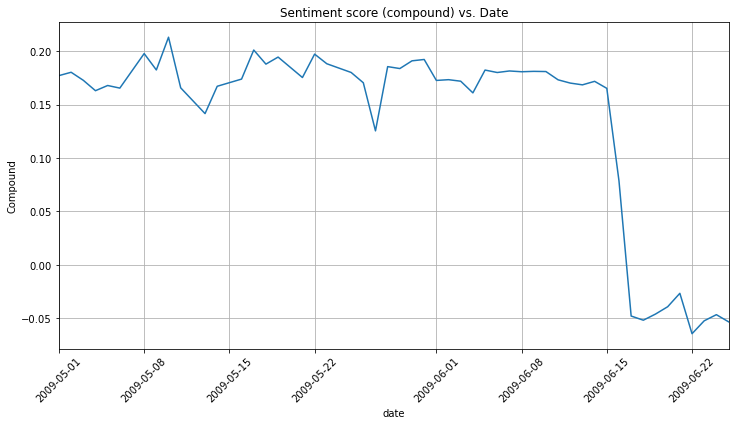

In [54]:
# Import library
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(12,6));
ax.plot(newdf_daily_merge.index.to_numpy(), newdf_daily_merge['sentiment_score'].to_numpy());
ax.set_xlabel('date');
ax.set_ylabel('Compound');
ax.grid(True);
ax.tick_params(axis='x',rotation=45);

ax.set_xlim(newdf_daily_merge.index.min(),newdf_daily_merge.index.max())
ax.set_title('Sentiment score (compound) vs. Date');

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [57]:
newdf_daily_merge.head()

,sentiment_score,weekday
date,,
2009-05-01,0.17718,Friday
2009-05-02,0.180311,Saturday
2009-05-03,0.172791,Sunday
2009-05-04,0.163054,Monday
2009-05-05,0.167923,Tuesday


In [58]:
newdf_daily_merge.isna()

,sentiment_score,weekday
date,,
2009-05-01,False,False
2009-05-02,False,False
2009-05-03,False,False
2009-05-04,False,False
2009-05-05,False,False
2009-05-06,False,False
2009-05-07,False,False
2009-05-08,False,False
2009-05-09,False,False


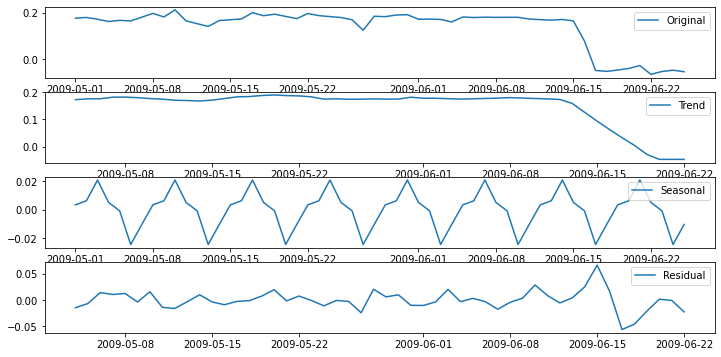

In [62]:
#daily_sentiment = daily_sentiment.resample('D').mean()
result = seasonal_decompose(newdf_daily_merge['sentiment_score'], model='additive')

trend = result.trend
seasonal =result.seasonal
residual = result.resid

plt.figure(figsize=(12,6))
plt.subplot(4,1,1)
plt.plot(newdf_daily_merge['sentiment_score'], label='Original')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residual, label='Residual')
plt.legend(loc='best')


### 4. Modeling Phase